In [1]:
import pandas as pd
import os

def writeData(filepath, has_header=True):
    if has_header:
        return pd.read_csv(filepath, header=0)  # First file: use header
    else:
        return pd.read_csv(filepath, header=None)  # Others: treat first row as data

def clearDirtyData(df):
    # Ensure we're comparing actual values, not strings
    df = df.replace([float('inf'), -float('inf')], 'Infinity')
    dropList = df[(df.iloc[:, 14] == "Nan") | (df.iloc[:, 15] == "Infinity")].index.tolist()
    return dropList

def mergeData():
    base_path = r'C:\Users\bzz00\Downloads\archive'
    files = [
        r"Monday-WorkingHours.pcap_ISCX.csv",
        "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
        "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
        "Friday-WorkingHours-Morning.pcap_ISCX.csv",
        "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
        "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
        "Tuesday-WorkingHours.pcap_ISCX.csv",
        "Wednesday-workingHours.pcap_ISCX.csv"
    ]

    # Load and store all DataFrames
    data_frames = [writeData(os.path.join(base_path, f)) for f in files]

    # Merge all DataFrames
    result = pd.concat(data_frames, ignore_index=True)

    # Clean dirty data
    #dirty_indices = clearDirtyData(result)
    #result = result.drop(dirty_indices)

    return result

# Load merged and cleaned data
raw_data = mergeData()
raw_data


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## Identifying duplicate values & Identifying missing values

In [2]:
data = raw_data.copy()
data.columns = data.columns.str.strip()
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

data.drop_duplicates(inplace = True)
data.shape

Number of duplicates: 308381


(2522362, 79)

In [3]:
import numpy as np
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')


missing = data.isna().sum()
print(missing.loc[missing > 0])


# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

Flow Bytes/s    353
dtype: int64
Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64
Initial missing values: 353
Missing values after processing infinite values: 3128
Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64
                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


In [4]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)


# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285
Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


### Analysing Patterns using Visualisations

In [5]:
data['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [6]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

data['Attack Type'].value_counts()


BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: Attack Type, dtype: int64

#### Use new column as target column

In [7]:
data.drop('Label', axis = 1, inplace = True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())
     
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

[0 3 7 1 6 8 2 4 5]
0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [8]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}")

In [9]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [10]:
print(f'Number of considerable important features: {len(pos_corr_features)}')


Number of considerable important features: 32


In [11]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols
     

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

## Visualization of Linear Relationships of columns (Continuous Numerical Variables)


In [12]:

# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [13]:

# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8693.111049           0.13%
Flow Duration                   16581323.773163       16638443.296708       0.34%
Total Fwd Packets               10.276271             10.227739             0.47%
Total Backward Packets          11.565964             11.475345             0.78%
Total Length of Fwd Packets     611.575108            594.124719            2.85%
Total Length of Bwd Packets     18133.153930          18393.204707          1.43%
Fwd Packet Length Max           231.091768            231.233733            0.06%
Fwd Packet Length Min           19.194641             19.245215             0.26%
Fwd Packet Length Mean          63.470104             63.567624             0.15%
Fwd Packet Length Std    

If the variation percentage is low (e.g., <5%), the sampled dataset closely resembles the original — good for modeling.

If a feature has high variation (>5%), your sample may be biased or unrepresentative for that feature, which could affect model accuracy.

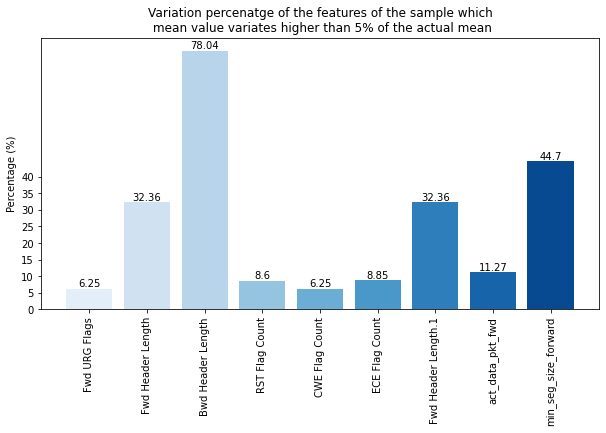

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

Helps understand the diversity in each feature.

Can help identify:

Categorical features (few unique values)

High-cardinality features (many unique values, e.g., IPs or ports)

Constant columns (only 1 unique value → often useless for modeling)

In [20]:

# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33263
2.  Flow Duration                 : 256536
3.  Total Fwd Packets             : 661
4.  Total Backward Packets        : 817
5.  Total Length of Fwd Packets   : 9024
6.  Total Length of Bwd Packets   : 24103
7.  Fwd Packet Length Max         : 3682
8.  Fwd Packet Length Min         : 236
9.  Fwd Packet Length Mean        : 35061
10. Fwd Packet Length Std         : 66267
11. Bwd Packet Length Max         : 3903
12. Bwd Packet Length Min         : 448
13. Bwd Packet Length Mean        : 45991
14. Bwd Packet Length Std         : 62838
15. Flow Bytes/s                  : 347062
16. Flow Packets/s                : 288296
17. Flow IAT Mean                 : 274126
18. Flow IAT Std                  : 229468
19. Flow IAT Max                  : 167179
20. Flow IAT Min                  : 45816
21. Fwd IAT Total                 : 119363
22. Fwd IAT Mean                  : 164203
23. Fwd IAT Std                   : 148357
24. Fwd IAT

In [23]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr().round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format("{:.2f}")

In [24]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [25]:

# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                        Outlier Count  Outlier Percentage
Fwd Packet Length Mean          35497                7.04
Fwd Packet Length Std           47140                9.34
Bwd Packet Length Mean          87562               17.36
Bwd Packet Length Std           88750               17.59
Flow Bytes/s                    95062               18.84
Flow Packets/s                  50568               10.02
Flow IAT Mean                  100789               19.98
Flow IAT Std                    86734               17.19
Fwd IAT Mean                   101667               20.15
Fwd IAT Std                    119522               23.69
Bwd IAT Mean                   104348               20.68
Bwd IAT Std                     99580               19.74
Fwd Packets/s                   51263               10.16
Bwd Packets/s                  118023               23.40
Packet Length Mean              76456               15.16
Packet Length Std               66131               13.11
Packet Length 

In [26]:

# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Fwd Packet Length Mean
- BENIGN: 32674 (7.80%)
- Port Scan: 38 (0.21%)
- DoS: 3308 (8.51%)
- DDoS: 0 (0.00%)
- Brute Force: 0 (0.00%)
- Bot: 12 (3.19%)
- Web Attack: 31 (7.40%)
- Infiltration: 0 (0.00%)

Feature: Fwd Packet Length Std
- BENIGN: 98753 (23.56%)
- Port Scan: 150 (0.82%)
- DoS: 6566 (16.90%)
- DDoS: 0 (0.00%)
- Brute Force: 1 (0.06%)
- Bot: 12 (3.19%)
- Web Attack: 31 (7.40%)
- Infiltration: 0 (0.00%)

Feature: Bwd Packet Length Mean
- BENIGN: 49931 (11.91%)
- Port Scan: 270 (1.48%)
- DoS: 7741 (19.92%)
- DDoS: 0 (0.00%)
- Brute Force: 1 (0.06%)
- Bot: 0 (0.00%)
- Web Attack: 31 (7.40%)
- Infiltration: 2 (20.00%)

Feature: Bwd Packet Length Std
- BENIGN: 100996 (24.10%)
- Port Scan: 51 (0.28%)
- DoS: 9772 (25.15%)
- DDoS: 0 (0.00%)
- Brute Force: 0 (0.00%)
- Bot: 0 (0.00%)
- Web Attack: 31 (7.40%)
- Infiltration: 2 (20.00%)

Feature: Flow Bytes/s
- BENIGN: 82015 (19.57%)
- Port Scan: 2189 (12.02%)
- DoS: 11089 (28.54%)
- DDoS: 4268 (16.55%)
- Brute Force: 381 (21.

## TARGET Analysis

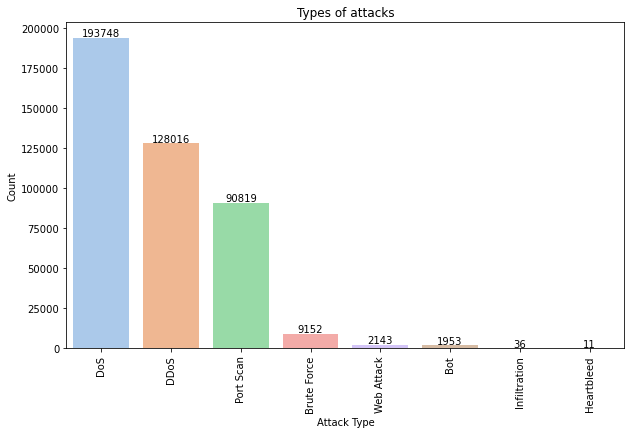

In [28]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

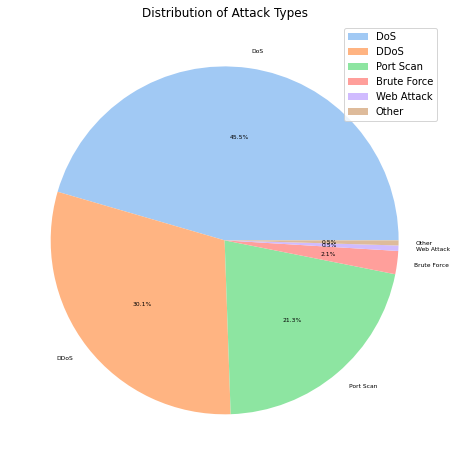

In [29]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

## Data Preprocessing

In [30]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [31]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [32]:
data.shape


(2522362, 71)

In [33]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Type
0,49188,4,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,49486,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,88,609,7,4,484,414,233,0,69.14286,111.967896,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Applying PCA to reduce dimensions


In [34]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [35]:

from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.23%


In [36]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.357586,-0.054992,0.576872,0.733625,3.730582,0.234969,-0.015879,-0.214994,-0.276919,1.087893,...,-0.134734,-0.285992,1.511682,-0.198043,-0.076113,0.000525,-0.025000,-0.075410,0.004689,BENIGN
1,-2.883798,-0.069952,0.910423,1.761316,8.846481,0.621126,-0.056388,1.110106,1.901538,-2.758895,...,0.241236,-2.289200,2.312464,-0.695112,0.038187,-0.000506,-0.178075,-0.118146,-0.182013,BENIGN
2,-2.416905,-0.056695,0.614795,0.849928,4.304440,0.276139,-0.020554,-0.069602,-0.034434,0.664446,...,-0.094241,-0.496170,1.601119,-0.249816,-0.063529,0.000405,-0.041428,-0.080155,-0.015330,BENIGN
3,-2.884649,-0.069993,0.911285,1.763431,8.851907,0.619389,-0.056562,1.108265,1.901971,-2.754921,...,0.239955,-2.276799,2.312925,-0.691655,0.038072,-0.000512,-0.177496,-0.118142,-0.181287,BENIGN
4,-1.505304,0.080902,-0.504128,0.290641,-0.539566,0.746747,0.103149,0.730047,-1.147598,-0.562684,...,-0.589028,0.147828,0.798696,-0.114669,0.152373,0.003178,0.028769,0.046970,-0.072669,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-1.967021,-0.034701,0.214235,-0.550036,-0.715353,-0.255852,-0.028693,-0.395458,0.253577,-0.399576,...,-0.296109,-0.081321,0.275948,-0.106684,-0.008535,-0.004229,0.044197,-0.285127,0.025767,BENIGN
2522358,-1.967214,-0.034825,0.140611,-0.769767,-1.329744,-1.049915,-0.083939,-0.676133,1.052980,-0.349738,...,0.178971,0.148677,0.025223,-0.200091,0.510140,-0.002220,0.003536,-0.010599,0.003960,BENIGN
2522359,-2.177563,-0.044111,0.882432,1.291810,4.455898,0.141254,-0.035183,0.676985,1.470028,-0.910629,...,-0.033970,1.554360,-0.114408,0.609097,-0.120385,-0.000671,0.066763,-0.095352,0.208956,BENIGN
2522360,-1.906991,-0.035741,0.236863,-0.648816,-0.915111,-0.480284,-0.047426,-0.496840,0.535837,-0.471448,...,-0.167078,0.067057,0.374914,-0.229637,0.333691,-0.003799,0.018642,-0.190422,0.046841,BENIGN


### 4. Machine Learning Models


In [38]:
# For cross validation
from sklearn.model_selection import cross_val_score

# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

1    7564
0    7436
Name: Attack Type, dtype: int64


In [39]:
bc_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
2011814,-1.936606,-0.051929,0.281899,-0.311490,0.740093,0.434772,0.011828,-0.285326,-0.526065,0.391482,...,-0.377120,-0.660126,-0.757798,-0.684984,0.080717,0.002585,0.072594,0.162689,0.041460,1
832389,-1.939152,0.002362,-0.121381,-0.263263,-0.466792,0.693982,0.072102,0.343517,-0.888146,-0.376990,...,-0.549195,0.174347,0.474061,0.158043,0.245619,0.004660,0.029835,0.146598,-0.108128,1
2038224,10.860717,-0.429850,-0.791401,-2.336704,2.109822,-0.905607,-0.130137,-1.434378,0.667459,1.546912,...,0.492251,0.161799,-0.133397,0.083070,-0.143126,0.001597,-0.408614,0.164422,0.079632,1
590419,-1.360347,-0.107852,0.657369,-0.390641,0.732913,0.328039,-0.000950,-0.447774,-0.451647,0.467044,...,-0.371805,-0.599116,-0.663996,-0.494460,-0.000564,0.005833,-0.129883,0.231055,0.109629,1
1058183,-2.242039,-0.021656,0.306867,0.462347,1.867721,0.781784,0.070696,-0.224793,-1.930718,2.506196,...,0.035619,0.511744,-2.050833,0.003411,-0.103950,-0.002349,0.164496,0.044274,-0.043875,0


In [40]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

In [41]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 0.9257777777777778, 0.9293333333333333, 0.9337777777777778, 0.9293333333333333, 0.9186666666666666

Mean cross-validation score: 0.93


### select the key features

 Three Label Options
Label Type	Description	Use Case	Pros	Cons
Attack Number	Multi-class (0–8, 9 types incl. benign)	Classify specific attack type	More granular, useful for deep insights	Harder to train, needs more data
Attack Type	Text label (e.g. "Bot", "DDoS")	Same as above, just textual	Human-readable	Must encode before training
is_attack (new binary)	0 = BENIGN, 1 = any attack	Binary classification (malicious or not)	Easier to train, good for anomaly detection	Less detailed, can't identify attack type

In [27]:
sampled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Type
759292,80,115449349,22,24,414,19585,294,0,18.818182,61.476001,...,20,4.480645e+04,2.789154e+04,128902,36242,1.000000e+07,5.624158e+03,10000000,9996049,BENIGN
4706,443,116429251,21,19,815,5350,372,0,38.809524,89.517383,...,20,8.967467e+04,2.244857e+05,802471,22909,9.612763e+06,1.348299e+06,10008076,5331349,BENIGN
2086403,53,184,2,2,64,128,32,32,32.000000,0.000000,...,40,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
903920,8031,44,1,1,0,6,0,0,0.000000,0.000000,...,40,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,Port Scan
2805853,53,31407,2,2,88,210,44,44,44.000000,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296500,443,5821368,7,4,677,174,517,0,96.714286,189.768029,...,32,3.979840e+05,0.000000e+00,397984,397984,5.423380e+06,0.000000e+00,5423380,5423380,BENIGN
139456,443,68740858,25,24,3243,6970,499,0,129.720000,210.544833,...,32,1.445964e+06,3.337180e+06,8257955,83477,1.001083e+07,3.279040e+05,10156498,9343320,BENIGN
2118361,53,60637,2,2,94,350,47,47,47.000000,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
144577,443,4829450,15,11,974,7387,469,0,64.933333,134.265976,...,32,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN


### Method 1: Correlation Strength (Absolute Value)

In [15]:
# Step 1: Compute correlation matrix (auto skips non-numeric)
corr = sampled_data.corr()

# Step 2: Get absolute correlation values with 'Attack Number'
abs_corr = corr['Attack Number'].abs().sort_values(ascending=False)

# Step 3: Select top N features (excluding 'Attack Number' itself)
top_features = abs_corr.drop('Attack Number').head(10).index.tolist()

print("Top correlated features with 'Attack Number':")
print(top_features)


Top correlated features with 'Attack Number':
['Bwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Avg Bwd Segment Size', 'Packet Length Std', 'Fwd IAT Std', 'Max Packet Length', 'Packet Length Variance', 'Idle Max', 'Idle Mean']


### Method 4: Feature Importance from Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Prepare data
X = sampled_data.drop(columns=['Attack Type', 'Attack Number'])  # drop label columns
y = sampled_data['Attack Number']  # binary target

# Step 2: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 3: Extract feature importances
import pandas as pd

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 4: Show top 20 important features
print("Top 20 Features by Random Forest Importance:\n")
print(feature_importance_df.head(20))

Top 20 Features by Random Forest Importance:

                        Feature  Importance
41            Packet Length Std    0.065672
42       Packet Length Variance    0.062363
54         Avg Bwd Segment Size    0.057369
39            Max Packet Length    0.051587
63            Subflow Fwd Bytes    0.048031
13        Bwd Packet Length Std    0.043372
52          Average Packet Size    0.043036
10        Bwd Packet Length Max    0.042485
5   Total Length of Bwd Packets    0.032205
65            Subflow Bwd Bytes    0.025836
12       Bwd Packet Length Mean    0.023614
4   Total Length of Fwd Packets    0.022323
6         Fwd Packet Length Max    0.020900
34            Fwd Header Length    0.020521
2             Total Fwd Packets    0.020253
53         Avg Fwd Segment Size    0.020102
0              Destination Port    0.019589
40           Packet Length Mean    0.019377
67      Init_Win_bytes_backward    0.018400
9         Fwd Packet Length Std    0.018240


In [17]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']